In [90]:
# Importing the Required library descibtive statistics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
plt.style.use('ggplot')

#imporitng the preprocessing tools
from sklearn.preprocessing import StandardScaler,PolynomialFeatures,LabelEncoder
from sklearn.model_selection import KFold,train_test_split,cross_val_score
from sklearn.decomposition import PCA

#importing the meachine learning models
from sklearn.ensemble import RandomForestRegressor

#importing the library for algorithm measures
from sklearn.metrics import accuracy_score,r2_score,mean_squared_error

#to make the graphs and plots embedded in the notebook
%matplotlib inline

In [91]:
#importing the data form gitHub(which original form kaggle)
Dataset = pd.read_csv('https://raw.githubusercontent.com/Tejasmallikarjuncj/Diamond_price_prediction/main/diamonds.csv')
print("The shape fo the Dataset is:",Dataset.shape)
Dataset.head()

The shape fo the Dataset is: (53940, 11)


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [92]:
#clearing the data set and replacing the str to number using LabelEncoder
Dataset.drop('Unnamed: 0',axis=1,inplace=True)
Dataset.drop(Dataset[Dataset.x == 0].index,inplace=True)
Dataset.drop(Dataset[Dataset.y == 0].index,inplace=True)
Dataset.drop(Dataset[Dataset.z == 0].index,inplace=True)
cols = np.array(Dataset.columns)[Dataset.dtypes == 'object']

# Replacing the string values by integers to process the data
label_encoder = LabelEncoder()
for col in cols:
    Dataset[col] = label_encoder.fit_transform(Dataset[col])

print("The shape of the dataset after cleaning:",Dataset.shape)
Dataset.head()

The shape of the dataset after cleaning: (53920, 10)


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


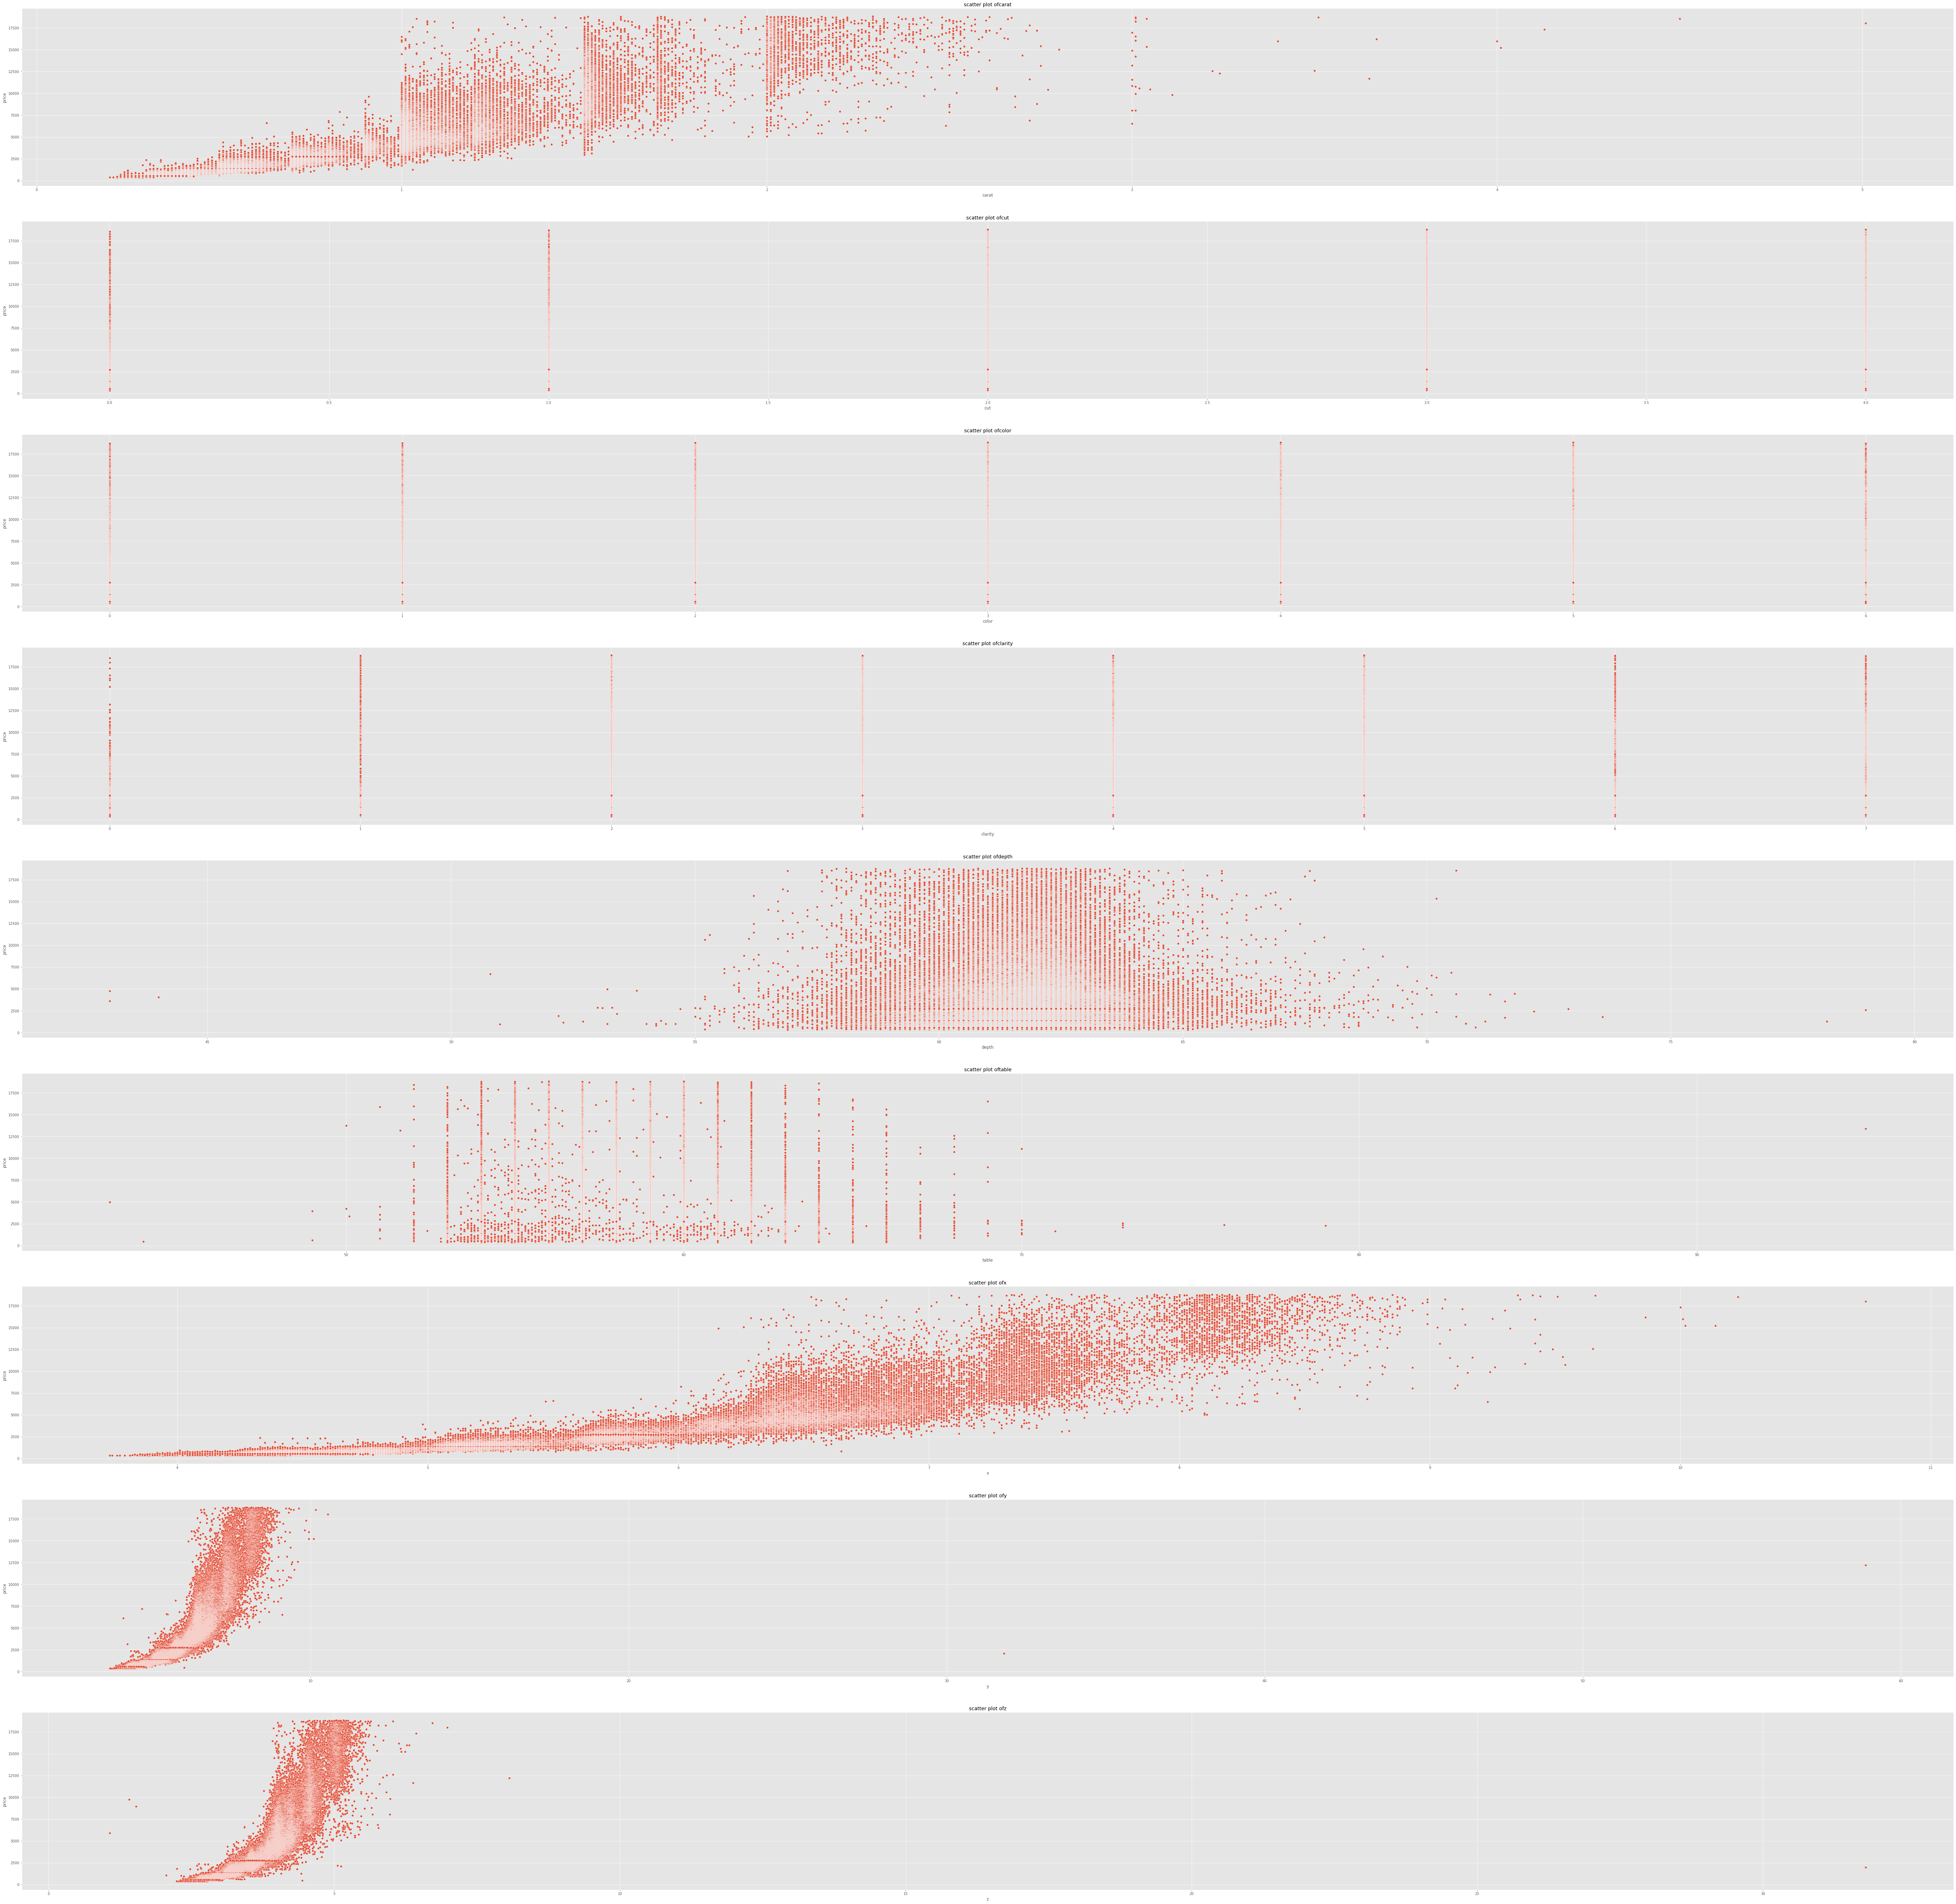

In [93]:
#visualizing the data using seaborn
#features = list(Dataset.columns)
#features.remove('price')
plt.figure(figsize=(100,100))
gs = GridSpec(9, 1)
for i, cn in enumerate(features):
    ax = plt.subplot(gs[i])
    f = sns.scatterplot(x=Dataset[cn].values,y=Dataset['price'].values)
    ax.set_xlabel(cn)
    ax.set_ylabel('price')
    ax.set_title('scatter plot of'+str(cn))
plt.show()

In [94]:
#removing the y term
Y = Dataset['price'].values
X = Dataset.values
Dataset.drop('price',axis=1,inplace=True)

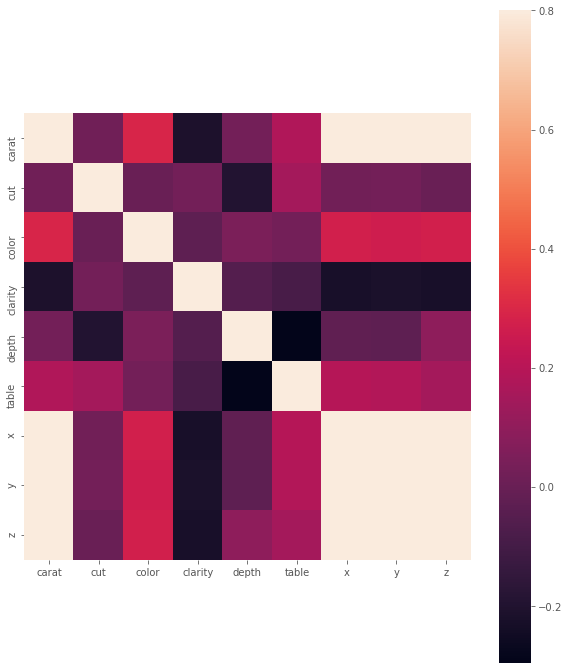

In [95]:
#finding the correlationship between the features
correlation_matrix = Dataset.corr()
fig = plt.figure(figsize=(10,12))
sns.heatmap(correlation_matrix,vmax=0.8,square = True)
plt.show()

From the above heatmap it is clear that we can apply PCA

In [99]:
#Doing the PCA
X = StandardScaler().fit_transform(X)
X = PCA(n_components = 5).fit_transform(X)

In [100]:
#We will split the data
X_train_vald, X_test, y_train_vald, y_test = train_test_split(X,Y,test_size = 0.1,random_state=2001)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_vald,y_train_vald,test_size = np.round((2/7),2),random_state=2022)

In [101]:
#we will evaluate the hyperparameters
Models = [RandomForestRegressor(n_estimators=i) for i in range(1,20)]
accuray_dict = dict()
for i,Model in enumerate(Models):
    Model.fit(X_train,y_train)
    y_pred =  Model.predict(X_valid)
    accuray_dict[i] = r2_score(y_valid,y_pred)    

1     0.969537
2     0.972598
3     0.975992
4     0.975465
5     0.976325
6     0.977224
7     0.976937
8     0.977402
9     0.978426
10    0.977825
11    0.978564
12    0.978825
13    0.978865
14    0.978489
15    0.979546
16    0.979379
17    0.979992
18    0.979520
19         NaN
dtype: float64

In [103]:
AccurayDataFrame = pd.Series(accuray_dict)
AccurayDataFrame

0     0.956782
1     0.969537
2     0.972598
3     0.975992
4     0.975465
5     0.976325
6     0.977224
7     0.976937
8     0.977402
9     0.978426
10    0.977825
11    0.978564
12    0.978825
13    0.978865
14    0.978489
15    0.979546
16    0.979379
17    0.979992
18    0.979520
dtype: float64

In [109]:
#chooing the best model
Model = Models[AccurayDataFrame.idxmax()]
y_pred = Model.predict(X_test)
print("Performance on test dataset")
print("R^2 : ",r2_score(y_test,y_pred))
print("MSE: ",mean_squared_error(y_test,y_pred))
print("RMSE: ",np.sqrt(mean_squared_error(y_test,y_pred)))

Performance on test dataset
R^2 :  0.978834276451679
MSE:  354549.5743877532
RMSE:  595.4406556389589


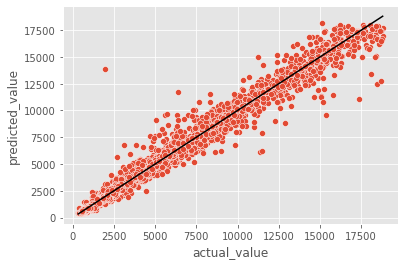

In [113]:
plt.figure()
sns.scatterplot(x=y_test,y=y_pred)
p1 = max(max( y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], "k-")
plt.xlabel("actual_value")
plt.ylabel("predicted_value")
plt.show()